In [1]:
from TightBinding import *

# Textbook examples

If $\Phi=1/2$, the flux quantization condition only requires a magnetic unit cell (MUC) two times bigger than a unit cell (UC).

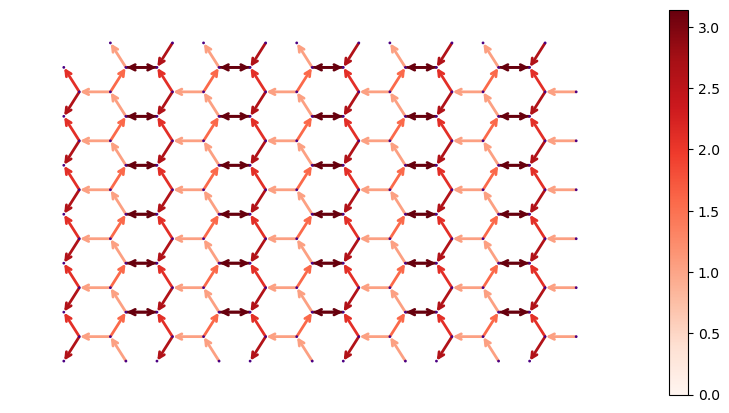

In [2]:
MagneticTB(Honeycomb, Phi='1/2').plot()

However, when we use the Landau-like potential, you get a MUC six times bigger than a unit cell. This problem was also recognized by Rammal (Rammal, R. (1985). Landau level spectrum of Bloch electrons in a honeycomb lattice. Journal de Physique, 46(8), 1345-1354.).

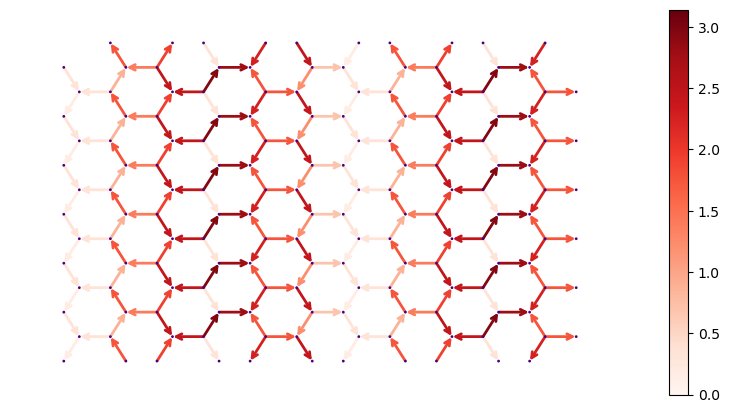

In [3]:
MagneticTB(Honeycomb, Phi='1/2',potential_type="landau").plot()

Can we solve this problem by generalizing Landau-like vector potential to "linear" vector potentials? ("linear" means the vector potential $\vec{A}(\vec{r})$ is linear in the position vector $\vec{r}$)

This solves the problem for the Honeycomb lattice.

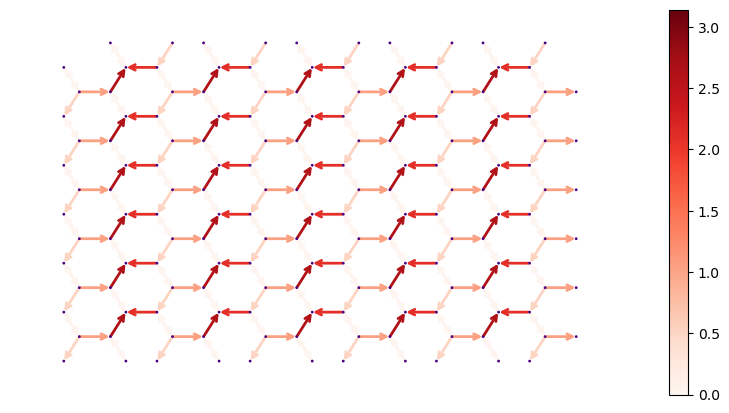

In [4]:
MagneticTB(Honeycomb, Phi='1/2',potential_type="linear").plot()

However, linear vector potentials require a MUC four times bigger than UC, for the Kagome lattice.

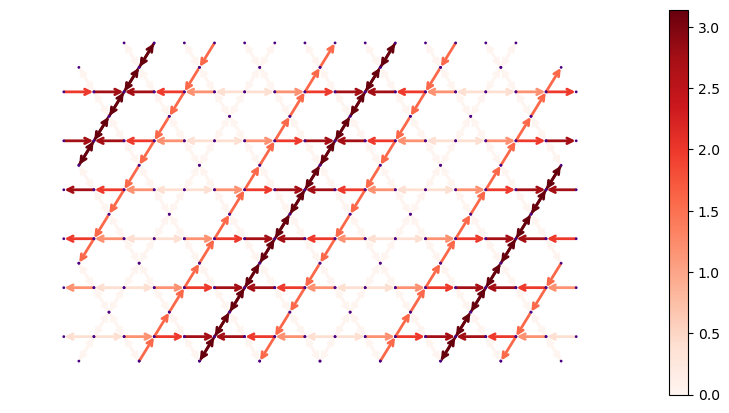

In [5]:
MagneticTB(Kagome, Phi='1/2',potential_type="linear").plot()

However, when we remove the constraint on the form of the vector potential (we call this "nonlinear" because vector potential 'can' be nonlinear), we can get the small MUC reduced to the exact lower bound given by the flux quantization requirement

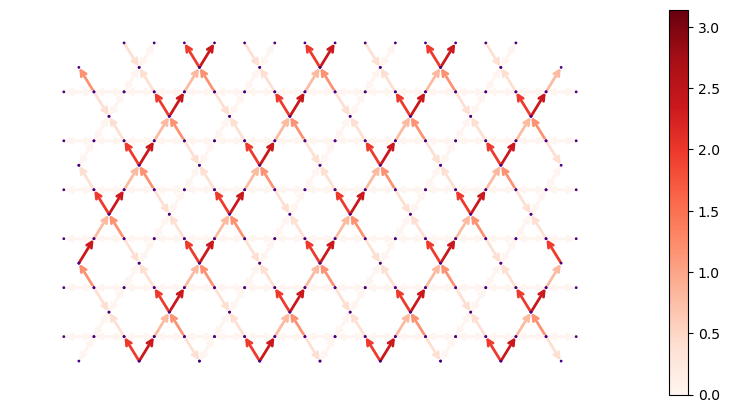

In [6]:
MagneticTB(Kagome, Phi='1/2',potential_type="nonlinear").plot()

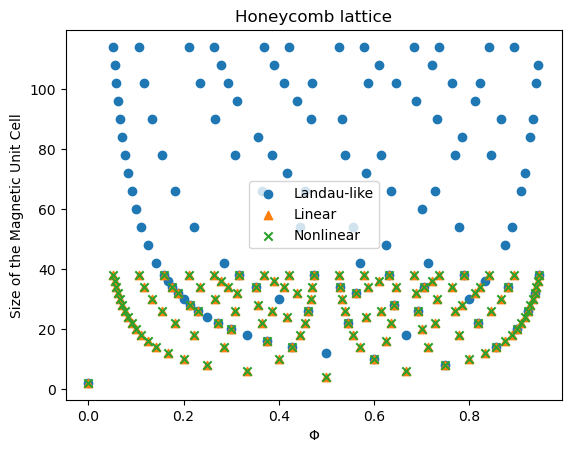

In [7]:
Phi = []
landau = []
linear = []
nonlinear = []
for q in range(1,20):
    for p in range(0,q):
        if gcd(p,q)==1:
            Phi.append(p/q)
            landau.append(len(MagneticTB(Honeycomb, Phi=sp.Rational(p,q), potential_type = "landau").atoms))
            linear.append(len(MagneticTB(Honeycomb, Phi=sp.Rational(p,q), potential_type = "linear").atoms))
            nonlinear.append(len(MagneticTB(Honeycomb, Phi=sp.Rational(p,q), potential_type = "nonlinear").atoms))

plt.scatter(Phi, landau, label='Landau-like')
plt.scatter(Phi, linear, label='Linear',marker='^')
plt.scatter(Phi, nonlinear, label='Nonlinear', marker='x')
plt.title("Honeycomb lattice")
plt.xlabel("$\Phi$")
plt.ylabel("Size of the Magnetic Unit Cell")
plt.legend(loc='best')
plt.show()

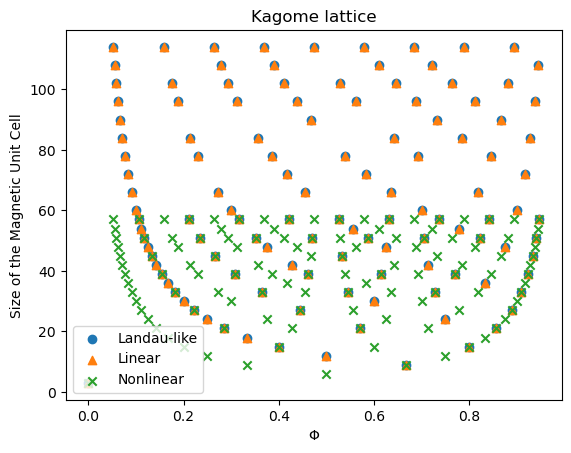

In [8]:
Phi = []
landau = []
linear = []
nonlinear = []
for q in range(1,20):
    for p in range(0,q):
        if gcd(p,q)==1:
            Phi.append(p/q)
            landau.append(len(MagneticTB(Kagome, Phi=sp.Rational(p,q), potential_type = "landau").atoms))
            linear.append(len(MagneticTB(Kagome, Phi=sp.Rational(p,q), potential_type = "linear").atoms))
            nonlinear.append(len(MagneticTB(Kagome, Phi=sp.Rational(p,q), potential_type = "nonlinear").atoms))

plt.scatter(Phi, landau, label='Landau-like')
plt.scatter(Phi, linear, label='Linear',marker='^')
plt.scatter(Phi, nonlinear, label='Nonlinear', marker='x')
plt.title("Kagome lattice")
plt.xlabel("$\Phi$")
plt.ylabel("Size of the Magnetic Unit Cell")
plt.legend(loc='best')
plt.show()

# moireTBG

For the case of moireTBG, the difference between Landau-like and nonlinear vector potential becomes huge. Following is the case of the magic-angle twisted bilayer graphene (MATBG). Here, since the construction of moireTBG is time-consuming, we rather use the equation derived in our paper().

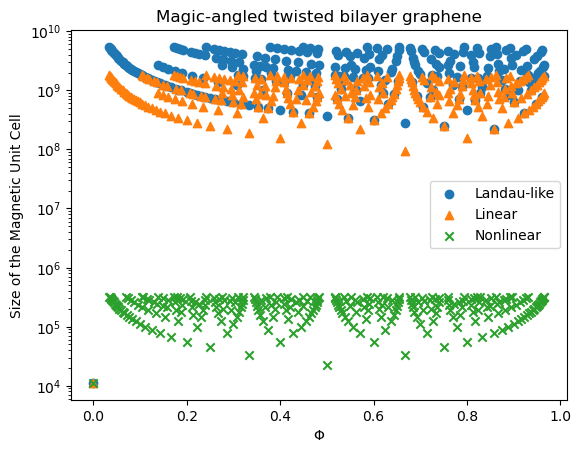

In [9]:
Phi = []
landau = []
linear = []
nonlinear = []
t = 61 #This corresponds to theta=1.1 deg. (MATBG)
for q in range(1,30):
    for p in range(0,q):
        if gcd(p,q)==1:
            Phi.append(p/q)
            nonlinear.append((3*t*t+1)*q)
            if p%3 != 0:
                g1 = gcd(p,(3*t*t+1)//2)
                landau.append((3*q*(3*t*t+1)**2)//(2*g1))
                linear.append((q*(3*t*t+1)**2)//(2*g1))
            else:
                g2 = gcd(p//3, (3*t*t+1)//2)
                landau.append((q*(3*t*t+1)**2)//(2*g2))
                linear.append((q*(3*t*t+1)**2)//(2*g2))

plt.scatter(Phi, landau, label='Landau-like')
plt.scatter(Phi, linear, label='Linear',marker='^')
plt.scatter(Phi, nonlinear, label='Nonlinear', marker='x')
plt.title("Magic-angled twisted bilayer graphene")
plt.xlabel("$\Phi$")
plt.ylabel("Size of the Magnetic Unit Cell")
plt.yscale('log')
plt.legend(loc='best')
plt.show()

Let's fix $\Phi=5/7$ and plot as a function of the twist angle $\theta$.

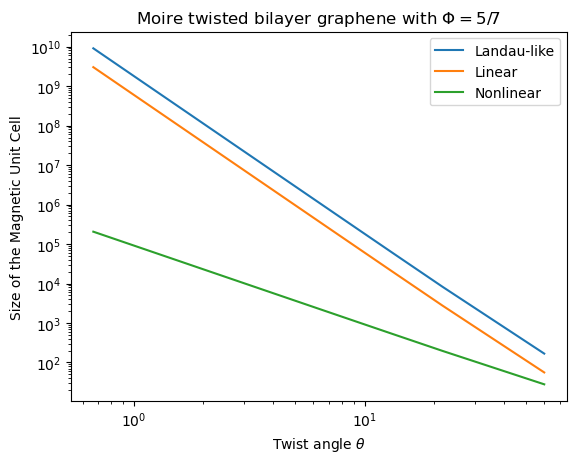

In [10]:
theta = []
landau = []
linear = []
nonlinear = []
p=5
q=7
for t in range(1,100,2):
    theta.append(acos((3*t*t-1)/(3*t*t+1))*180/pi)
    nonlinear.append((3*t*t+1)*q)
    if p%3 != 0:
        g1 = gcd(p,(3*t*t+1)//2)
        landau.append((3*q*(3*t*t+1)**2)//(2*g1))
        linear.append((q*(3*t*t+1)**2)//(2*g1))
    else:
        g2 = gcd(p//3, (3*t*t+1)//2)
        landau.append((q*(3*t*t+1)**2)//(2*g2))
        linear.append((q*(3*t*t+1)**2)//(2*g2))

plt.plot(theta, landau, label='Landau-like')
plt.plot(theta, linear, label='Linear')
plt.plot(theta, nonlinear, label='Nonlinear')
plt.title("Moire twisted bilayer graphene with $\Phi=5/7$")
plt.xlabel(r"Twist angle $\theta$")
plt.ylabel("Size of the Magnetic Unit Cell")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

This is huge! With nonlinear vector potentials, MATBG region becomes tractable!